# **Import Libraries and modules**

###Third Revision:</br>
###Updates:</br>
* Introducing scheduled Learning rate</br>
* Increasing batch size to 128</br>
* Added one convolution layer at image size 7x7, so that the biggest kernal used is reduced to 5x5</br>
###Summary:</br>
Parameters reduced to 15,590</br>
###Accuracy increased to 99.42</br></br>
No.of Epochs 30</br>


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


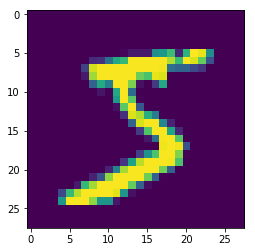

In [112]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [115]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [117]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [118]:
from keras.layers import Activation, MaxPooling2D,BatchNormalization,Dropout
from keras.optimizers import Adam
model = Sequential() 

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False,name='layer1'))#......26......rf3....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer2'))#......24......rf5....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer3'))#......22......rf7....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1 ,1, activation='relu',use_bias=False,name='layer5'))#......11......rf14....

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer6'))#......9......rf16....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer7'))#......7......rf18....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer8'))#......6......rf18....
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False,name='final'))
model.add(Convolution2D(10, 5, 5,use_bias=False,name='layer9'))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False, name="layer1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False, name="layer2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False, name="layer3")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, name="layer5")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_36 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 24, 24, 16)        1440      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 22, 22, 16)        2304      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, name="final")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), use_bias=False, name="layer9")`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [120]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 21s 350us/step - loss: 0.3482 - acc: 0.8854 - val_loss: 0.0705 - val_acc: 0.9771
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 116us/step - loss: 0.0958 - acc: 0.9699 - val_loss: 0.0694 - val_acc: 0.9782
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 113us/step - loss: 0.0746 - acc: 0.9769 - val_loss: 0.0455 - val_acc: 0.9839
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 113us/step - loss: 0.0655 - acc: 0.9795 - val_loss: 0.0407 - val_acc: 0.9879
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [122]:
print(score)

[0.019622710947855376, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [124]:
print(y_pred[:9])
print(y_test[:9])

[[2.80401028e-12 2.62222017e-07 3.21368603e-08 4.17533252e-09
  5.10532831e-11 3.05348906e-11 2.11230667e-20 9.99999404e-01
  1.07158935e-11 2.29248670e-07]
 [1.71524596e-06 3.14277750e-05 9.99963045e-01 3.63458845e-08
  1.28656279e-06 9.54651247e-10 2.29371449e-06 5.80833266e-08
  1.14336039e-07 9.26835775e-10]
 [2.02228520e-07 9.99975681e-01 4.21342946e-07 5.55734014e-10
  1.82775457e-05 2.05366426e-08 3.09815729e-09 5.22335768e-06
  1.41036168e-07 2.47300456e-08]
 [9.99992132e-01 7.96073114e-13 3.27055254e-08 1.16980932e-08
  1.58222075e-08 4.27045634e-08 4.51716460e-06 4.73276696e-11
  2.59512888e-07 3.10312203e-06]
 [1.38931444e-09 1.04390248e-08 1.31571765e-09 5.11298360e-13
  9.99789774e-01 2.04815742e-09 1.66883796e-09 4.24821733e-09
  1.54605768e-08 2.10239989e-04]
 [1.81760402e-08 9.99922276e-01 4.25756298e-07 1.22218555e-10
  4.17590745e-05 3.07311510e-09 7.23139743e-11 3.53459873e-05
  2.80238837e-08 1.25281503e-07]
 [6.86387050e-15 3.27347425e-06 1.58145419e-09 1.44281881e

16


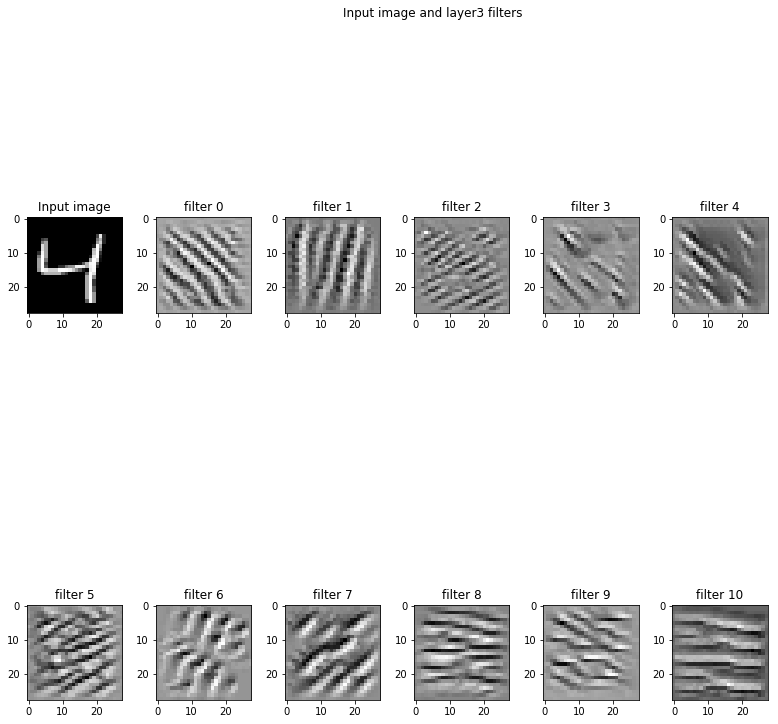

In [125]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(layer_name,img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print(layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x,plot_y, figsize = (12, 12))
    reshape = img.reshape((28, 28))
    ax[0, 0].imshow(reshape, cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name= 'layer3')

16


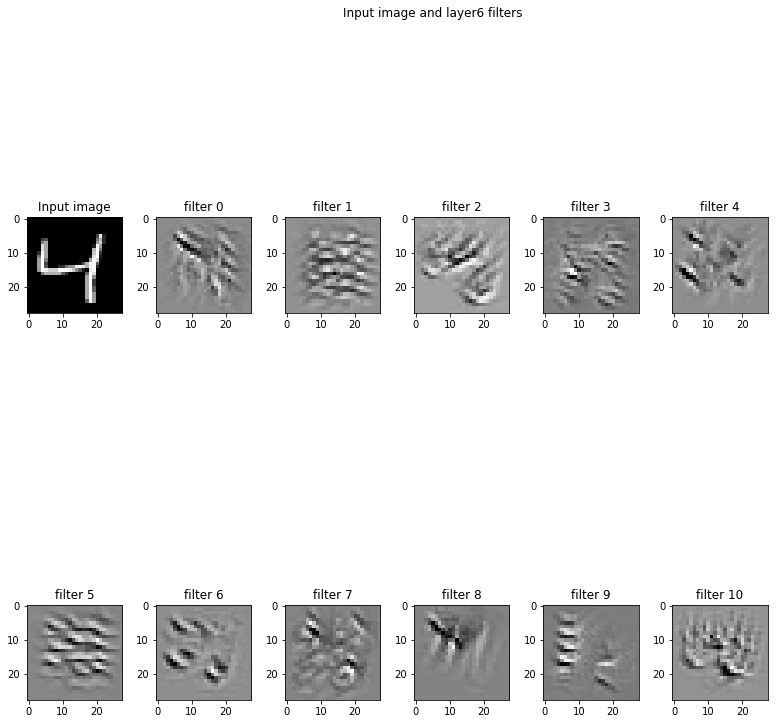

In [126]:
vis_img_in_filter(layer_name= 'layer6')